In [1]:
import matplotlib.pyplot as plt
import numpy as np
# this allows plots to appear directly in the notebook
%matplotlib inline

## Dataset

| x   | t [s]  |
| --- | ------ |
| 2   | 0.004  |
| 3   | 0.012  |
| 4   | 0.064  |
| 5   | 0.19   |
| 6   | 1.54   |
| 7   | 13.82  |
| 8   | 102    |
| 9   | 913.48 |

In [2]:
x = np.array([2, 3, 4, 5, 6, 7, 8, 9])
t = np.array([0.004, 0.012, 0.064, 0.19, 1.54, 13.82, 102, 913.48])

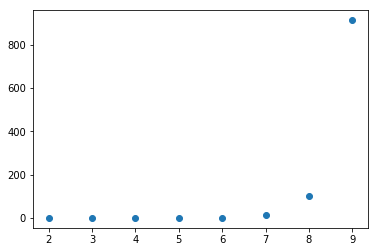

In [3]:
plt.scatter(x, t)
plt.show()

## Exponential regression

* We want to find a function `y = a*e^(b*x)`, i.e. find `a` and `b`.
* Reorder to `log t = log a + bx`
* We will fit `t` against `log x`

In [4]:
# exponential fit with weighted t
fit = np.polyfit(t, np.log(x), 1)
print(f'a = {fit[0]}\nb = {fit[1]}')


a = 0.0008415066719257637
b = 1.4917676919490122


In [5]:
def fn(x):
    return fit[0]*np.exp(fit[1]*x)

In [6]:
approx_x = np.linspace(2,10,100)
approx_t = np.array([fn(x) for x in approx_x])

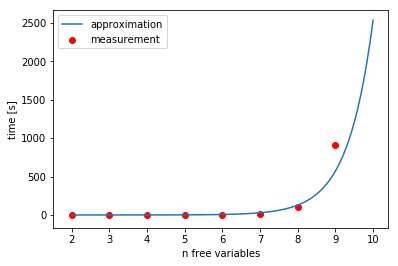

In [7]:
plt.plot(approx_x, approx_t, label='approximation')
plt.scatter(x, t, color='red', label='measurement')
plt.legend()
plt.xlabel('n free variables')
plt.ylabel('time [s]')
plt.show()

Let's extrapolate a couple of steps

In [8]:
print(f'10: {fn(10) / 60:2.3} hours')
print(f'12: {fn(12) / 3600:3.4} days')
print(f'15: {fn(15) / 3600 / 356:3.4} years')

10: 42.2 hours
12: 13.9 days
15: 3.43 years
